In [ ]:
# Import NumPy library and give it the alias "np"
import numpy as np

# Import Pandas library and give it the alias "pd"
import pandas as pd

# Import TensorFlow library and give it the alias "tf"
import tensorflow as tf

# Import the backend module from TensorFlow's Keras API and give it the alias "K"
import tensorflow.keras.backend as K

# Import the pyplot module from Matplotlib and give it the alias "plt"
import matplotlib.pyplot as plt

# Import the image module from Matplotlib and give it the alias "mpimg"
import matplotlib.image as mpimg

# Import the tqdm function from the tqdm library
from tqdm import tqdm

# Import the image module from Keras' preprocessing module
from keras.preprocessing import image

# Set the maximum number of columns to display in Pandas DataFrames as 50
pd.options.display.max_columns = 50

 All definitions come from the source paper "Retinal Fundus Multi-Disease Image Dataset (RFMiD): A Dataset for Multi-Disease Detection Research."

DR - Diabetic retinopathy
ARMD - Age-related macular degeneration
MH - Media haze
DN - Drusen
MYA - Myopia
BRVO - Branch retinal vein occlusion
TSLN - Tessellation
ERM - Epiretinal membrane
LS - Laser scars
MS - Macular scars
CSR - Central serous retinopathy
ODC - Optic disc cupping
CRVO - Central retinal vein occlusion
TV - Tortuous vessels
AH - Asteroid hyalosis
ODP - Optic disc pallor
ODE - Optic disc edema
ST - Optociliary shunt
AION - Anterior ischemic optic neuropathy
PT - Parafoveal telangiectasia
RT - Retinal traction
RS - Retinitis
CRS - Chorioretinitis
EDN - Exudation
RPEC - Retinal pigment epithelium changes
MHL - Macular hole
RP - Retinitis pigmentosa
CWS - Cotton-wool spots
CB - Coloboma
ODPM - Optic disc pit maculopathy
PRH - Preretinal hemorrhage
MNF - Myelinated nerve fibers
HR - Hemorrhagic retinopathy
CRAO - Central retinal artery occlusion
TD - Tilted disc
CME -Cystoid macular edema
PTCR - Post-traumatic choroidal rupture
CF - Choroidal folds
VH - Vitreous hemorrhage
MCA - Macroaneurysm
VS - Vasculitis
BRAO - Branch retinal artery occlusion
PLQ - Plaque
HPED - Hemorrhagic pigment epithelial detachment
CL - Collateral

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator,')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import the virtual_memory function from the psutil module
from psutil import virtual_memory

# Get the total amount of available RAM in gigabytes
ram_gb = virtual_memory().total / 1e9

# Print the available RAM in gigabytes
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

# Check if the available RAM is less than 20 gigabytes
if ram_gb < 20:
    # Print instructions to enable a high-RAM runtime
    print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
    print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
    print('re-execute this cell.')
else:
    # Print a message if a high-RAM runtime is already being used
    print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [1]:
# Importing the necessary module "drive" from the package "google.colab"
from google.colab import drive

# Mounting the Google Drive in the Colab environment
# The "/drive" directory will be used as the mount point for the Google Drive
# The "force_remount=True" argument ensures that the drive will be remounted even if it was previously mounted
drive.mount("/drive", force_remount=True)

Mounted at /drive


In [ ]:
!pip install zipfile36

In [ ]:
import zipfile
Training_set = zipfile.ZipFile("/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Training_Set.zip", 'r')

In [ ]:
X_train = pd.read_csv('/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Training_Set/RFMiD_Training_Labels.csv')
X_test= pd.read_csv('/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Test_Set/RFMiD_Testing_Labels.csv')
X_val=pd.read_csv('/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Evaluation_Set/RFMiD_Validation_Labels.csv')

In [ ]:
X_train.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.describe()
#No missing value

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.0,1920.000000,1920.000000,1920.0,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,960.500000,0.791146,0.195833,0.052083,0.165104,0.071875,0.052604,0.038021,0.096875,0.007292,0.024479,0.007812,0.019271,0.146875,0.014583,0.003125,0.008333,0.033854,0.030208,0.002604,0.008854,0.005729,0.007292,0.022396,0.016667,0.007812,0.011458,0.005729,0.003125,0.001563,0.000521,0.0,0.001042,0.001563,0.0,0.001042,0.001563,0.002083,0.002604,0.001563,0.000521,0.000521,0.000521,0.001042,0.000521,0.000521,0.000521
std,554.400577,0.406596,0.396944,0.222253,0.371371,0.258348,0.223300,0.191296,0.295865,0.085102,0.154572,0.088065,0.137511,0.354073,0.119909,0.055829,0.090930,0.180901,0.171205,0.050978,0.093703,0.075494,0.085102,0.148006,0.128052,0.088065,0.106456,0.075494,0.055829,0.039508,0.022822,0.0,0.032266,0.039508,0.0,0.032266,0.039508,0.045608,0.050978,0.039508,0.022822,0.022822,0.022822,0.032266,0.022822,0.022822,0.022822
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,480.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,960.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1440.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1920.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train['filename'] = X_train.apply(lambda x : "/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Training_Set/Training/" +str(x['ID']) + ".png", axis=1)
X_val['filename'] = X_val.apply(lambda x : "/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Validation_Set/Validation/" +str(x['ID']) + ".png", axis=1)
X_test['filename'] = X_test.apply(lambda x : "/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Test_Set/Test/" +str(x['ID']) + ".png", axis=1)

In [ ]:
X_train = X_train.drop('ID', axis=1)
X_val = X_val.drop('ID', axis=1)
X_test = X_test.drop('ID', axis=1)

In [ ]:
X_train

,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,filename
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/drive/My Drive/JOB/JINGLIN Projects/Healthcar...
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/drive/My Drive/JOB/JINGLIN Projects/Healthcar...
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/drive/My Drive/JOB/JINGLIN Projects/Healthcar...
3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/drive/My Drive/JOB/JINGLIN Projects/Healthcar...
4,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/drive/My Drive/JOB/JINGLIN Projects/Healthcar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/drive/My Drive/JOB/JINGLIN Projects/Healthcar...
1916,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/drive/My Drive/JOB/JINGLIN Projects/Healthcar...
1917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/drive/My Drive/JOB/JINGLIN Projects/Healthcar...
1918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/drive/My Drive/JOB/JINGLIN Projects/Healthcar...


In [ ]:
print(X_train.head(1))
print(X_train.shape)
#46 class + risk evaluation (47 features)

   Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ERM  LS  MS  CSR  ODC  \
0             1   1     0   0   0    0     0     0    0   0   0    0    0   

   CRVO  TV  AH  ODP  ODE  ST  AION  PT  RT  RS  CRS  EDN  RPEC  MHL  RP  CWS  \
0     0   0   0    0    0   0     0   0   0   0    0    0     0    0   0    0   

   CB  ODPM  PRH  MNF  HR  CRAO  TD  CME  PTCR  CF  VH  MCA  VS  BRAO  PLQ  \
0   0     0    0    0   0     0   0    0     0   0   0    0   0     0    0   

   HPED  CL                                           filename  
0     0   0  /drive/My Drive/JOB/JINGLIN Projects/Healthcar...  
(1920, 47)


In [ ]:
#datasets
X_train_img = X_train['filename']
X_val_img = X_val['filename']
y_train = X_train.drop(['filename'], axis=1)
y_val = X_val.drop(['filename'], axis=1)

print('shape of X_train:', X_train_img.shape)
print('shape of Validation:', X_val_img.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_val:', y_val.shape)

shape of X_train: (1920,)
shape of Validation: (640,)
shape of y_train: (1920, 46)
shape of y_val: (640, 46)


In [ ]:
# Importation of packages and datasets

# Import the 'os' module to interact with the operating system
import os

# Import the 'tqdm' module to display progress bars for iterations
from tqdm import tqdm

# Import the 'glob' function to retrieve file paths matching a specified pattern
from glob import glob

# Import the OpenCV library for image processing
import cv2

# Import the Pandas library for data manipulation and analysis
import pandas as pd

# Import the NumPy library for numerical computations
import numpy as np

# Import the Matplotlib library for creating visualizations and plotting graphs
import matplotlib.pyplot as plt

# Import the 'seaborn' library for statistical data visualization
import seaborn as sns

# Import the NumPy library (again) for additional numerical computations
import numpy as np

# Import the TensorFlow library for deep learning tasks
import tensorflow as tf

# Import the 'filterwarnings' function from the 'warnings' module to suppress warning messages
from warnings import filterwarnings

# Ignore warning messages to keep the output clean
filterwarnings('ignore')



In [ ]:
# Plot some random images

# Import the OpenCV library for image processing
import cv2

# Import the random module for selecting random images
import random

# Define a function called plotImages
def plotImages():
    # Initialize a variable 'i' with a value of 1
    i = 1

    # Create a new matplotlib figure with a size of 15 inches in width and 10 inches in height
    plt.figure(figsize=(15, 10))

    # Loop to plot 15 random images
    for r in random.sample(glob('/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Training_Set/Training/**.png'), 15):
        # Create a subplot in the matplotlib figure with a 3x5 grid and select the i-th subplot
        plt.subplot(3, 5, i)

        # Read the image from the selected file path using OpenCV's imread function
        img = cv2.imread(r)

        # Reverse the image along the last axis (change from BGR to RGB format)
        img = tf.reverse(img, axis=[-1])

        # Adjust the contrast of the image by multiplying pixel values by a factor of 1.5
        img = tf.image.adjust_contrast(img, 1.5)

        # Display the processed image on the selected subplot
        plt.imshow(img)

        # Increment the 'i' variable to move to the next subplot index
        i += 1

        # Turn off the axis labels and ticks for the current subplot to display the image without additional annotations
        plt.axis('off')

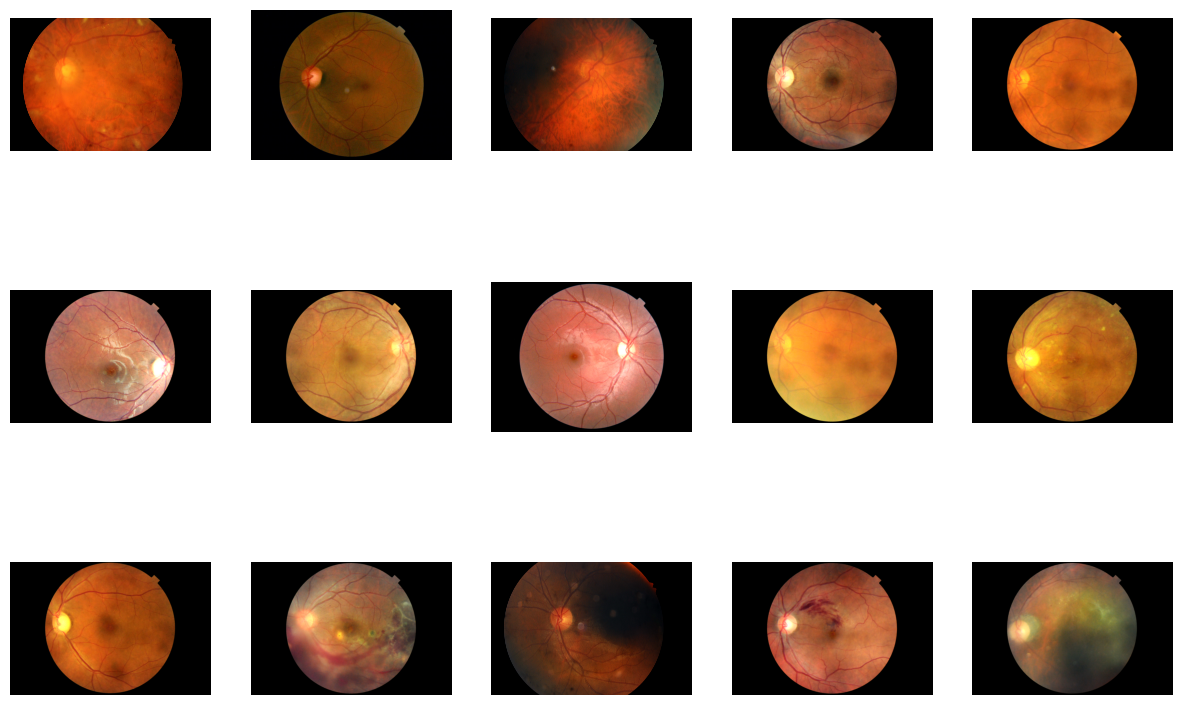

In [ ]:
plotImages() #Seems we have to convert to RGB format

In [ ]:
# Preprocessing images

In [ ]:
# Define the desired shape of the input images
IMG_SHAPE = (300, 450)

# Define the batch size for processing samples during training or inference
BATCH_SIZE = 64

In [ ]:
# Use the @tf.function decorator to create a TensorFlow graph for optimization and speedup
@tf.function
# Function for preprocessing images
def scale_down(img):
    # Convert the image to float32 data type for numerical operations
    img = tf.cast(img, dtype=tf.float32)

    # Resize the image to the desired shape (300x450) using the 'nearest' interpolation method
    img = tf.image.resize(img, (300, 450), method='nearest')

    # Scale down pixel values to the range [0, 1] by dividing by 255 (normalization)
    img = (img / 255)

    return img

# Function for preprocessing the training images
def preprocessing_data(img):

    # Read and decode the images from the file path 'img'
    img = tf.io.read_file(img)
    img = tf.io.decode_png(img, channels=3)

    # Adjust the contrast of the image by multiplying pixel values by a factor of 1.35
    img = tf.image.adjust_contrast(img, 1.35)

    # Call the 'scale_down' function to resize and normalize the image
    img = scale_down(img)

    return img

In [ ]:
# Datasets preprocessing
# Set the 'AUTO' constant to the value returned by tf.data.experimental.AUTOTUNE
AUTO = tf.data.experimental.AUTOTUNE

# Convert the target labels (y_train and y_val) to numpy arrays and cast them to float32 data type
y_train = np.array(y_train).astype('float32')
y_val = np.array(y_val).astype('float32')

# Create TensorFlow datasets from the tensor slices of image file paths and corresponding target labels
dataset_train = tf.data.Dataset.from_tensor_slices((X_train_img, y_train))
dataset_val = tf.data.Dataset.from_tensor_slices((X_val_img, y_val))

# Preprocess the training dataset
dataset_train = (dataset_train
                 # Shuffle the training dataset with a buffer size of 1000
                 .shuffle(1000)
                 # Map the preprocessing_data function and the target labels to each element in parallel using AUTOTUNE
                 .map(lambda x, y: [preprocessing_data(x), y], num_parallel_calls=AUTO)
                 # Batch the dataset with a batch size of BATCH_SIZE and drop any remaining elements to ensure consistent batch sizes
                 .batch(BATCH_SIZE, drop_remainder=True)
                 # Prefetch the dataset to asynchronously fetch batches while the model is training
                 .prefetch(AUTO)
                )

# Preprocess the validation dataset
dataset_val = (dataset_val
               # Map the preprocessing_data function and the target labels to each element in parallel using AUTOTUNE
               .map(lambda x, y: [preprocessing_data(x), y], num_parallel_calls=AUTO)
               # Batch the dataset with a batch size of BATCH_SIZE and drop any remaining elements to ensure consistent batch sizes
               .batch(BATCH_SIZE, drop_remainder=True)
               # Prefetch the dataset to asynchronously fetch batches while the model is training
               .prefetch(AUTO)
              )

# Print the preprocessed training and validation datasets
print(dataset_train)
print(dataset_val)

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 300, 450, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 46), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 300, 450, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 46), dtype=tf.float32, name=None))>


In [ ]:
# Function to visualize original and augmented images side by side
def visualize(original, augmented):
    # Create a new matplotlib figure
    fig = plt.figure()

    # Add a subplot for the original image on the left
    plt.subplot(1, 2, 1)

    # Set the title of the subplot to 'Original image'
    plt.title('Original image')

    # Display the original image
    plt.imshow(original)

    # Turn off the axis labels and ticks for the subplot
    plt.axis('off')

    # Add a subplot for the augmented image on the right
    plt.subplot(1, 2, 2)

    # Set the title of the subplot to 'Augmented image'
    plt.title('Augmented image')

    # Display the augmented image
    plt.imshow(augmented)

    # Turn off the axis labels and ticks for the subplot
    plt.axis('off')

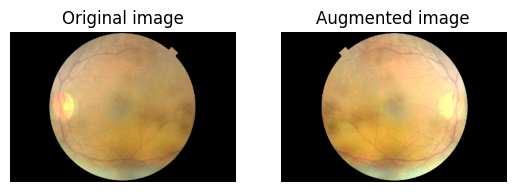

In [ ]:
# Get the next batch of data (image, label) from the training dataset
image, label = next(iter(dataset_train))

# Convert the image and label tensors to NumPy arrays for visualization
image, label = image.numpy()[0], label.numpy()[0]

# Apply left-right flipping to the image using TensorFlow's tf.image.flip_left_right function
flipped = tf.image.flip_left_right(image)

# Adjust the contrast of the flipped image by multiplying pixel values by a factor of 1.35 using TensorFlow's tf.image.adjust_contrast function
flipped = tf.image.adjust_contrast(flipped, 1.35)

# Call the 'visualize' function to display the original image and its augmented version side by side
visualize(image, flipped)

In [ ]:
# why augmented Image?

In [ ]:
# Import necessary libraries
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.tensorflow import balanced_batch_generator

# Define a custom data generator class that combines ImageDataGenerator with RandomOversampling
class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, datagen, batch_size=64):
        # Initialize the data generator, batch size, and fit the data generator on the input data 'x'
        self.datagen = datagen
        self.batch_size = min(batch_size, x.shape[0])
        datagen.fit(x)

        # Create a balanced batch generator using RandomOverSampler to handle class imbalance
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)

        # Calculate the total number of samples in the data generator
        self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])

    # Define the length of the data generator
    def __len__(self):
        return self.steps_per_epoch

    # Define how to get data batches from the generator
    def __getitem__(self, idx):
        # Get a batch of data using the balanced batch generator
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])

        # Use the data generator to perform data augmentation on the batch
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()



In [ ]:
# Method 2 try reference: https://www.kaggle.com/code/nicholasmcelroy/retinal-disease-classification-in-tf#Retinal-Disease-Classification:-Multiclass-Classification

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
from keras.preprocessing import image
pd.options.display.max_columns = 50

In [ ]:
train_df = pd.read_csv('/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Training_Set/RFMiD_Training_Labels.csv')
val_df = pd.read_csv('/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Test_Set/RFMiD_Testing_Labels.csv')
test_df =pd.read_csv('/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Evaluation_Set/RFMiD_Validation_Labels.csv')

In [ ]:
train_df['img_path'] = train_df.apply(lambda x : "/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Training_Set/Training/" +str(x['ID']) + ".png", axis=1)
val_df['img_path'] = val_df.apply(lambda x : "/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Evaluation_Set/Validation/" +str(x['ID']) + ".png", axis=1)
test_df['img_path'] = test_df.apply(lambda x : "/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Test_Set/Test/" +str(x['ID']) + ".png", axis=1)

In [ ]:
train_df = train_df.drop(labels=['ID'],axis=1)

In [ ]:
columns = list(train_df.columns)
columns.remove('img_path')
d_total = 0
for col in columns:
    print(col)
    print(train_df[col].value_counts())
    print('----------------')
    if col != 'Disease_Risk':
        d_total += train_df[col].sum()

print(d_total)

Disease_Risk
1    1519
0     401
Name: Disease_Risk, dtype: int64
----------------
DR
0    1544
1     376
Name: DR, dtype: int64
----------------
ARMD
0    1820
1     100
Name: ARMD, dtype: int64
----------------
MH
0    1603
1     317
Name: MH, dtype: int64
----------------
DN
0    1782
1     138
Name: DN, dtype: int64
----------------
MYA
0    1819
1     101
Name: MYA, dtype: int64
----------------
BRVO
0    1847
1      73
Name: BRVO, dtype: int64
----------------
TSLN
0    1734
1     186
Name: TSLN, dtype: int64
----------------
ERM
0    1906
1      14
Name: ERM, dtype: int64
----------------
LS
0    1873
1      47
Name: LS, dtype: int64
----------------
MS
0    1905
1      15
Name: MS, dtype: int64
----------------
CSR
0    1883
1      37
Name: CSR, dtype: int64
----------------
ODC
0    1638
1     282
Name: ODC, dtype: int64
----------------
CRVO
0    1892
1      28
Name: CRVO, dtype: int64
----------------
TV
0    1914
1       6
Name: TV, dtype: int64
----------------
AH
0    190

In [ ]:
train_df = train_df.drop(labels=['Disease_Risk','ODPM', 'HR'], axis=1)
val_df = val_df.drop(labels=['ID', 'Disease_Risk', 'ODPM', 'HR'], axis=1)
test_df = test_df.drop(labels=['ID', 'Disease_Risk', 'ODPM', 'HR'], axis=1)

In [ ]:
train_df.columns

Index(['DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM', 'LS', 'MS',
       'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST', 'AION', 'PT',
       'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS', 'CB', 'PRH',
       'MNF', 'CRAO', 'TD', 'CME', 'PTCR', 'CF', 'VH', 'MCA', 'VS', 'BRAO',
       'PLQ', 'HPED', 'CL', 'img_path'],
      dtype='object')

In [ ]:
#ODPM and HR have no positive examples so we will drop the columns.
# Since we're trying to predict specific diseases, we'll drop Disease_Risk to help with imbalancing.
# A lot of the columns have very few examples, so we will have to do some oversampling and use class weights.
# Some images are representative of more than one disease, since d_total is greater than the total number of images. We'll need to do multilabel classification.

In [ ]:
def weight_calc(col):
    total = len(train_df)
    weight = (1 / train_df[col].sum()) *  total / 2
    return weight

In [ ]:
Y_train = list(train_df.drop(['img_path'], axis=1).columns)
Y_val = list(val_df.drop(['img_path'], axis=1).columns)
Y_test = list(test_df.drop(['img_path'], axis=1).columns)
unq_disease = len(Y_train)

In [ ]:
plt.subplots(3, 4, figsize=(240, 160))
for i in range(12):
    plt.subplot(3,4, i + 1)
    img = mpimg.imread(train_df.iloc[i][43])
    plt.imshow(img)

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rotation_range=90,
                                                                brightness_range=[0, 0.1])
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# The value for class_mode in flow_from_dataframe MUST be 'raw' if you are attempting to do multilabel classification.
train_gen = train_datagen.flow_from_dataframe(train_df,
                                              x_col='img_path',
                                              y_col=Y_train,
                                              target_size=(150,150),
                                              class_mode='raw',
                                              batch_size=16,
                                              shuffle=True)
val_gen = val_datagen.flow_from_dataframe(val_df,
                                          x_col='img_path',
                                          y_col=Y_val,
                                          target_size=(150,150),
                                          class_mode='raw',
                                          batch_size=16
                                          )
test_gen = test_datagen.flow_from_dataframe(test_df,
                                            x_col='img_path',
                                            y_col=Y_test,
                                            target_size=(150,150),
                                            class_mode='raw')

In [ ]:
def UNet(inputs):
    # First convolution block
    x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    d1_con = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(x)
    d1 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d1_con)

    # Second convolution block
    d2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d1)
    d2_con = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d2)
    d2 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d2_con)

    # Third convolution block
    d3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d2)
    d3_con = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d3)
    d3 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d3_con)

    # Fourth convolution block
    d4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d3)
    d4_con = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d4)
    d4 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d4_con)

    # Bottleneck layer
    b = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d4)
    b = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(b)

    # First upsampling block
    u1 = tf.keras.layers.Conv2DTranspose(512, 3, strides =(2,2),padding='same')(b)
    u1 = tf.keras.layers.Concatenate(axis=3)([u1, d4_con])
    u1 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u1)
    u1 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u1)

    # Second upsampling block
    u2 = tf.keras.layers.Conv2DTranspose(256, 3, strides =(2,2),padding='valid')(u1)
    u2 = tf.keras.layers.Concatenate(axis=3)([u2, d3_con])
    u2 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u2)
    u2 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u2)

    # Third upsampling block
    u3 = tf.keras.layers.Conv2DTranspose(128, 3, strides =(2,2),padding='valid')(u2)
    u3 = tf.keras.layers.Concatenate(axis=3)([u3, d2_con])
    u3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u3)
    u3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u3)

    # Fourth upsampling block
    u4 = tf.keras.layers.Conv2DTranspose(64, 3, strides =(2,2),padding='same')(u3)
    u4 = tf.keras.layers.Concatenate(axis=3)([u4, d1_con])
    u4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u4)
    u4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u4)

    # Flatten and output
    flat = tf.keras.layers.Flatten()(u4)
    out = tf.keras.layers.Dense(units=unq_disease, activation='sigmoid')(flat)
    model = tf.keras.Model(inputs=[inputs], outputs=[out])
    return model

In [ ]:
auc = tf.keras.metrics.AUC(multi_label=True,thresholds=[0,0.5])
aucpr = tf.keras.metrics.AUC(curve='PR',multi_label=True,thresholds=[0,0.5])
inputs = tf.keras.layers.Input(shape=(150,150,3))
unet = UNet(inputs)
unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=[auc, aucpr])
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 150, 150, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 150, 150, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
unet.fit(train_gen, epochs=5, validation_data=val_gen)

Epoch 1/5
120/120 [==============================] - 3641s 30s/step - loss: 0.1058 - auc: 0.5049 - auc_1: 0.0268 - val_loss: 0.2330 - val_auc: 0.4073 - val_auc_1: 0.0244
Epoch 2/5
120/120 [==============================] - 3538s 29s/step - loss: 0.0919 - auc: 0.5010 - auc_1: 0.0264 - val_loss: 0.3012 - val_auc: 0.4064 - val_auc_1: 0.0242
Epoch 3/5
120/120 [==============================] - 3490s 29s/step - loss: 0.0905 - auc: 0.5011 - auc_1: 0.0268 - val_loss: 0.3053 - val_auc: 0.4090 - val_auc_1: 0.0250
Epoch 4/5
120/120 [==============================] - 3549s 30s/step - loss: 0.0892 - auc: 0.5025 - auc_1: 0.0293 - val_loss: 0.3277 - val_auc: 0.4074 - val_auc_1: 0.0247
Epoch 5/5
  4/120 [>.............................] - ETA: 50:42 - loss: 0.0948 - auc: 0.1992 - auc_1: 0.0307

In [ ]:
# Evaluating the performance of the U-Net model on the test dataset.
# The method "evaluate" is called on the U-Net model, and the "test_gen" data generator is provided as the input.
# The "test_gen" data generator generates batches of test data to be used for evaluation.
# The evaluation process will compute the model's performance metrics, such as loss and accuracy, on the test data.
# The results of the evaluation will be returned and can be used for further analysis and comparison with other models or baselines.
unet.evaluate(test_gen)

In [ ]:
#https://www.kaggle.com/code/vexxingbanana/retinal-disease-classification
#https://www.kaggle.com/code/anthodata/retinal-disease-classification
#https://www.kaggle.com/code/nicholasmcelroy/retinal-disease-classification-in-tf#Retinal-Disease-Classification:-Multiclass-Classification